In [1]:
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install fbprophet
except:
  print("Error installing facebook prophet")
finally:
  clear_output()
  print('Facebook Prophet was successfully installed')

Facebook Prophet was successfully installed


In [6]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import datetime as dt
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
price_per_acre_df= pd.read_csv("./national_price_per_acre.csv")
price_per_acre_df.head()

,year,price_per_acre
0,1970,196
1,1971,203
2,1972,219
3,1973,246
4,1974,302


In [8]:
price_per_acre_df["year"] = pd.to_datetime(price_per_acre_df['year'], format="%Y")

In [9]:
# Rename the columns to the Prophet model syntax 
price_per_acre_df = price_per_acre_df.rename(columns={"year":"ds", "price_per_acre":"y"})

# Review the Canada DataFrame
price_per_acre_df.tail()

,ds,y
46,2016-01-01,2990
47,2017-01-01,3030
48,2018-01-01,3100
49,2019-01-01,3160
50,2020-01-01,3160


In [10]:
# Creating a Prophet model for the price prediction
model = Prophet()

In [11]:
# Fitting the Prophet model
model.fit(price_per_acre_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
# Forecast 50 years of yearly future trends data 
future_farmland_prices = model.make_future_dataframe(periods=50, freq="Y")

# Display the last five rows of the future_farmland_prices DataFrame
future_farmland_prices.tail()

,ds
96,2065-12-31
97,2066-12-31
98,2067-12-31
99,2068-12-31
100,2069-12-31


In [13]:
# Making predictions using the future_farmland_prices DataFrame
forecast_farmland_prices = model.predict(future_farmland_prices)

# Display the first five rows of the forecast_canada DataFrame
forecast_farmland_prices.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,-4.575726,120.367186,402.033071,-4.575726,-4.575726,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,269.246292
1,1971-01-01,20.679151,133.699815,443.236648,20.679151,20.679151,268.648831,268.648831,268.648831,268.648831,268.648831,268.648831,0.0,0.0,0.0,289.327982
2,1972-01-01,45.934029,163.101017,466.931078,45.934029,45.934029,263.056840,263.056840,263.056840,263.056840,263.056840,263.056840,0.0,0.0,0.0,308.990868
3,1973-01-01,71.258097,191.809316,502.798476,71.258097,71.258097,278.568914,278.568914,278.568914,278.568914,278.568914,278.568914,0.0,0.0,0.0,349.827011
4,1974-01-01,96.512975,213.713279,523.698190,96.512975,96.512975,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,370.334993


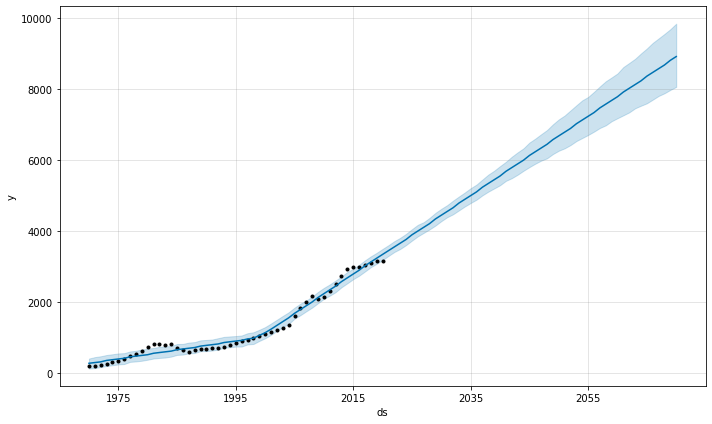

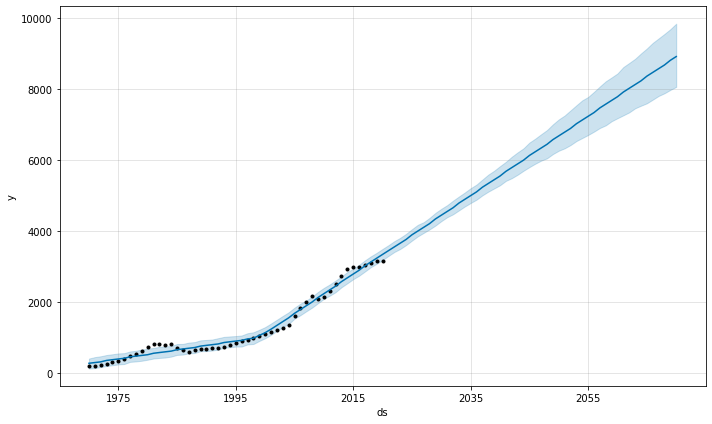

In [14]:
# Ploting the Prophet predictions  
model.plot(forecast_farmland_prices)

In [15]:
# Setting the index in the forecast_canada DataFrame to the ds datetime column 
forecast_farmland_prices = forecast_farmland_prices.set_index('ds')

# Display the forecast_canada DataFrame
forecast_farmland_prices.head()



,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1970-01-01,-4.575726,120.367186,402.033071,-4.575726,-4.575726,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,269.246292
1971-01-01,20.679151,133.699815,443.236648,20.679151,20.679151,268.648831,268.648831,268.648831,268.648831,268.648831,268.648831,0.0,0.0,0.0,289.327982
1972-01-01,45.934029,163.101017,466.931078,45.934029,45.934029,263.056840,263.056840,263.056840,263.056840,263.056840,263.056840,0.0,0.0,0.0,308.990868
1973-01-01,71.258097,191.809316,502.798476,71.258097,71.258097,278.568914,278.568914,278.568914,278.568914,278.568914,278.568914,0.0,0.0,0.0,349.827011
1974-01-01,96.512975,213.713279,523.698190,96.512975,96.512975,273.822019,273.822019,273.822019,273.822019,273.822019,273.822019,0.0,0.0,0.0,370.334993


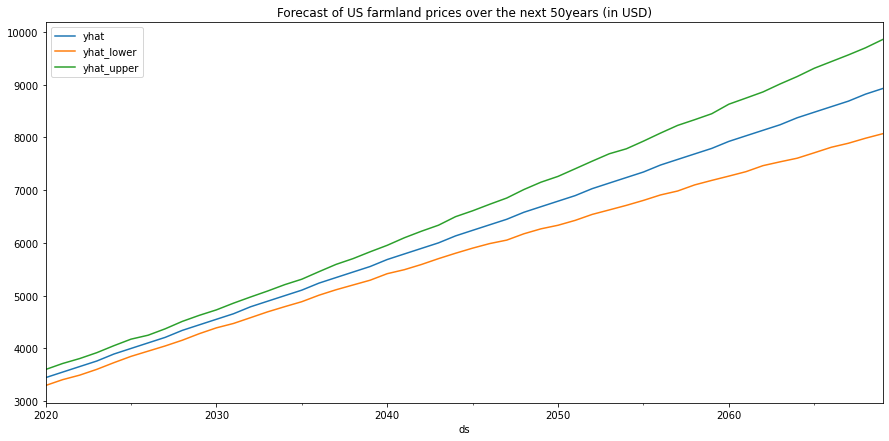

In [18]:
# Plot predictions for our forecast_canada DataFrame for the 50 year period 
forecast_farmland_prices[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-50:,:].plot(figsize= (15,7),title= "Forecast of US farmland prices over the next 50years (in USD)" )




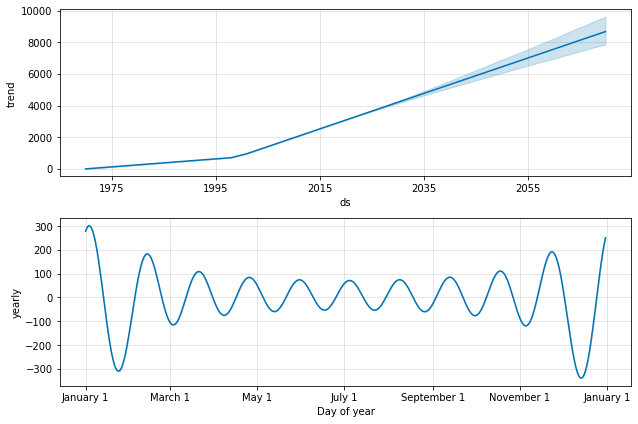

In [ ]:
# Reseting the index in the forecast_farmland_prices DataFrame
forecast_farmland_prices = forecast_farmland_prices.reset_index()

# Using the plot_components function to visualize the forecast results 

fig = model.plot_components(forecast_farmland_prices)